In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
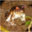

In [8]:
X_train[0]

In [9]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
classes[8]

'ship'

A quick data exploration

In [11]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


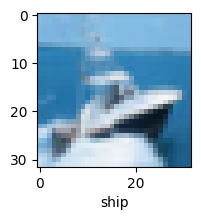

In [12]:
plot_sample(X_train, y_train, 8)

lets normalize the data

In [13]:
X_train = X_train/255
X_test = X_test/255

cnn model implentation

In [14]:
CNN = models.Sequential([

      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),


      layers.Flatten(),
      layers.Dense(64, activation= 'relu'),
      layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
CNN.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
CNN.fit(X_train,y_train, epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3789 - loss: 1.7052
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5887 - loss: 1.1718
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6372 - loss: 1.0346
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6718 - loss: 0.9373
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6976 - loss: 0.8687
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7154 - loss: 0.8139
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7311 - loss: 0.7702
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7478 - loss: 0.7264
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7606 - loss: 0.6864
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7726 - loss: 0.6560
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7866 - loss: 0.6152
Epoch 12/15
1563/1563 ━━━━━━━━

In [17]:
CNN.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6999 - loss: 0.9483


[0.9540654420852661, 0.6960999965667725]

In [18]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

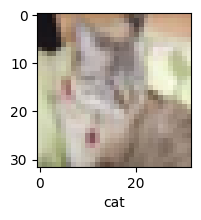

In [19]:
plot_sample(X_test, y_test,8)

In [20]:
y_pred = CNN.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.31966917e-05, 1.42257513e-05, 2.89403397e-04, 9.57830667e-01,
        1.84762117e-04, 3.46939117e-02, 6.17967977e-04, 3.02639855e-05,
        6.32025348e-03, 5.33056800e-06],
       [2.61494401e-03, 2.79762521e-02, 5.57537376e-08, 3.46207898e-08,
        4.98748098e-10, 1.04765654e-10, 1.93819145e-11, 9.14264398e-09,
        9.67732012e-01, 1.67671277e-03],
       [5.52557409e-02, 3.83981884e-01, 4.08503832e-03, 3.36590074e-02,
        5.77413244e-03, 5.12526650e-03, 2.54722054e-05, 7.15437066e-03,
        4.56771910e-01, 4.81672287e-02],
       [9.10872877e-01, 7.14993197e-03, 1.61244406e-03, 1.55471775e-04,
        8.81268425e-05, 7.03698097e-05, 5.07731856e-05, 1.40327160e-04,
        7.78352097e-02, 2.02436559e-03],
       [2.61689381e-09, 3.81157661e-05, 1.49841513e-02, 5.94371915e-01,
        2.03601807e-01, 4.42938600e-03, 1.82573453e-01, 2.97393452e-08,
        1.03231639e-06, 1.86658710e-07]], dtype=float32)

3.8039181e-03, 2.2416294e-02, 1.4921943e-02, 3.7577614e-01,
        2.6527187e-03, 1.2213330e-01, 3.9418980e-01, 1.4800207e-04,
        1.4629406e-03, 6.2494967e-02],
       [1.5533549e-05, 2.0657519e-03, 1.8263263e-10, 3.8646393e-09,
        1.6887276e-14, 1.0534999e-11, 2.5499854e-12, 1.1085313e-12,
        9.9790740e-01, 1.1285722e-05],
       ....................
       the values distribute between 0 and 1 because of softmax.



In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 3]

In [22]:
y_testt = y_test[:5]
y_testt

array([3, 8, 8, 0, 6], dtype=uint8)

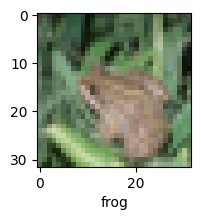

In [23]:
plot_sample(X_test, y_testt,4)

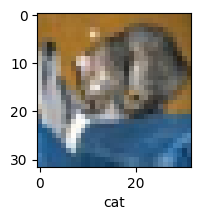

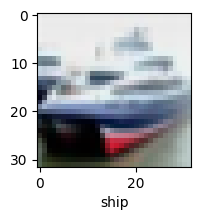

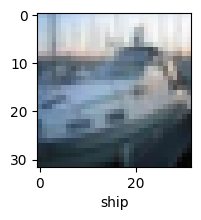

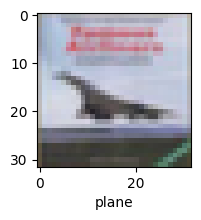

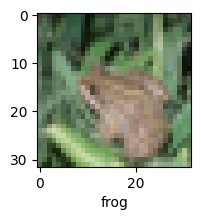

In [24]:
plot_test = [plot_sample(X_test, y_testt, i) for i in range(5)]

In [25]:
classes

['plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Hyperparameter tuning


In [26]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

In [27]:
# Hyperparameters for SGD optimizer
initial_learning_rate = 0.01  # Adjust as needed
momentum = 0.9
weight_decay = 1e-4  # If you need L2 regularization, set it on layers individually

# Define the SGD optimizer with your hyperparameters
optimizer = SGD(learning_rate=initial_learning_rate, momentum=momentum)

# Compile the model with the SGD optimizer
CNN.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate scheduler (optional, for learning rate decay)
def lr_schedule(epoch, lr):
    if epoch > 10:  # After epoch 10, decay the learning rate
        return lr * 0.1
    return lr

# Add the learning rate scheduler to the callbacks
callbacks = [LearningRateScheduler(lr_schedule, verbose=1)]

# Training the model
history = CNN.fit(X_train, y_train,  # Replace with your actual training data
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),  # Replace with validation data
                    callbacks=callbacks)

print("Training complete.")


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4350 - loss: 1.5743 - val_accuracy: 0.6060 - val_loss: 1.1940 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6987 - loss: 0.8583 - val_accuracy: 0.5910 - val_loss: 1.2604 - learning_rate: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7231 - loss: 0.7916 - val_accuracy: 0.6316 - val_loss: 1.1525 - learning_rate: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7295 - loss: 0.7674 - val_accuracy: 0.6339 - val_loss: 1.1452 - learning_rate: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999

In [28]:
# Extract history information
best_epoch = np.argmax(history.history['val_accuracy'])  # Epoch with the highest validation accuracy

# Display parameters and performance for the best epoch
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Validation Accuracy: {history.history['val_accuracy'][best_epoch]}")
print(f"Best Training Accuracy: {history.history['accuracy'][best_epoch]}")
print(f"Best Validation Loss: {history.history['val_loss'][best_epoch]}")
print(f"Best Training Loss: {history.history['loss'][best_epoch]}")

# Best learning rate from scheduler
best_lr = lr_schedule(best_epoch, initial_learning_rate)
print(f"Learning Rate at Best Epoch: {best_lr}")


Best Epoch: 15
Best Validation Accuracy: 0.6796000003814697
Best Training Accuracy: 0.8735799789428711
Best Validation Loss: 1.1728981733322144
Best Training Loss: 0.36122092604637146
Learning Rate at Best Epoch: 0.001


In [29]:
# Initial hyperparameters used in the SGD optimizer
best_learning_rate = lr_schedule(best_epoch, initial_learning_rate)  # Learning rate at the best epoch
best_momentum = momentum  # Momentum remains constant

# Display the best SGD hyperparameters
print("Best SGD Hyperparameters:")
print(f"Learning Rate at Best Epoch: {best_learning_rate}")
print(f"Momentum: {best_momentum}")


Best SGD Hyperparameters:
Learning Rate at Best Epoch: 0.001
Momentum: 0.9
